In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import math
from typing import List
Vector = List[float]
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

from sklearn.model_selection import train_test_split



In [4]:
read = tfds.as_dataframe(*tfds.load(
        'wine_quality',
        split='train[:100%]',
        with_info=True))

names = list(read.columns)
new_names = [i.split('/')[1] for i in names[:-1]] + [names[-1]]

read.rename(columns=dict(zip(names, new_names)), inplace=True);

2022-11-08 23:38:57.070646: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-08 23:38:57.079718: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 23:38:57.080288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-08 23:38:57.080446: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-08 23:38:57.080646: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [5]:
read

alcohol  chlorides  citric acid  density  fixed acidity  \
0         9.0      0.054         0.34  1.00080            7.6   
1        12.2      0.063         0.49  0.99110            6.3   
2        11.2      0.029         0.11  0.99076            5.3   
3         9.0      0.110         0.27  0.99672            6.6   
4        12.0      0.035         0.30  0.99016            5.9   
...       ...        ...          ...      ...            ...   
4893     11.3      0.051         0.44  0.99058            6.4   
4894     10.8      0.050         0.27  0.99476            6.1   
4895      8.7      0.051         0.59  0.99886            8.1   
4896     10.6      0.031         0.28  1.00295            6.8   
4897     12.8      0.029         0.28  0.99054            6.6   

      free sulfur dioxide    pH  residual sugar  sulphates  \
0                    44.0  3.22       18.350000       0.55   
1                    35.0  3.38        1.200000       0.42   
2                     6.0  3.51        1.100000       0.48   
3                    20.0  3.08       10.700000       0.41   
4                    57.0  3.09        3.800000       0.34   
...                   ...   ...             ...        ...   
4893                 39.0  3.11        1.200000       0.75   
4894                 51.0  3.22       11.500000       0.37   
4895                 60.0  2.96       13.600000       0.39   
4896                 27.0  3.06       26.049999       0.42   
4897                 12.0  3.19        6.100000       0.27   

      total sulfur dioxide  volatile acidity  quality  
0                    197.0              0.32        5  
1                     92.0              0.27        6  
2                     51.0              0.43        4  
3                    103.0              0.41        6  
4                    135.0              0.34        6  
...                    ...               ...      ...  
4893                 122.0              0.16        7  
4894                 133.0              0.24        6  
4895                 134.0              0.36        5  
4896                 122.0              0.45        6  
4897                  93.0              0.36        7  

[4898 rows x 12 columns]

In [6]:
attr_list=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

for i in attr_list:
    col_obj= read[i]
    val=col_obj.values
    print(i)
    sns.histplot(col_obj,bins=30)
    plt.show()

fixed acidity
volatile acidity
citric acid
residual sugar
chlorides
free sulfur dioxide


KeyboardInterrupt: 

In [ ]:
def sum_of_squares(v: Vector) -> float:
    return np.dot(v, v)
def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)
def median_odd(xs: List[float]) -> float:
    return sorted(xs)[len(xs) // 2]
def median_even(xs: List[float]) -> float:
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2
def median(v: List[float]) -> float:
    return median_even(v) if len(v) % 2 == 0 else median_odd(v)
def mode(x: List[float]) -> List[float]:
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
    if count == max_count]
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]
def variance(xs: List[float]) -> float:
    assert len(xs) >= 2
    n = 11
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (11 - 1)
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys)
    return np.dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)
def correlation(xs: List[float], ys: List[float]) -> float:
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0
def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

In [ ]:
print("The mean for the following attributes")
read[attr_list].mean()

In [7]:
#Variance
for i in attr_list:
    col_obj= read[i]
    val=col_obj.values
    print("And the variance of "+i+" is",end=" ")
    #print(val)
    print((variance(val)))

And the variance of fixed acidity is 348.7220258537829
And the variance of volatile acidity is 4.9751272373071975
And the variance of citric acid is 7.172044878252396
And the variance of residual sugar is 12597.909647927034
And the variance of chlorides is 0.23375031644279534
And the variance of free sulfur dioxide is 141642.15998366682
And the variance of total sulfur dioxide is 884440.0648683136
And the variance of density is 0.004380625143896196
And the variance of pH is 11.165738365855272
And the variance of sulphates is 6.378198490536651
And the variance of alcohol is 741.6148914898777


In [8]:
cov = []
for i in attr_list:
    cov1 = []
    for j in attr_list:
        cov1.append(covariance(read[i],read[j]))
    cov.append(cov1)
        
for num0,i in enumerate(attr_list):
    for num1,j in enumerate(attr_list):
        print(f'covariance of {i} and {j} is',cov[num0][num1])

covariance of fixed acidity and fixed acidity is 0.712113591696514
covariance of fixed acidity and volatile acidity is -0.0019305709730495166
covariance of fixed acidity and citric acid is 0.02953251174910314
covariance of fixed acidity and residual sugar is 0.3810218181013688
covariance of fixed acidity and chlorides is 0.00042562551487225665
covariance of fixed acidity and free sulfur dioxide is -0.7089185897445263
covariance of fixed acidity and total sulfur dioxide is 3.2660135988084416
covariance of fixed acidity and density is 0.0006696773154234768
covariance of fixed acidity and pH is -0.054264825033815176
covariance of fixed acidity and sulphates is -0.0016509920407872362
covariance of fixed acidity and alcohol is -0.12553281626092636
covariance of volatile acidity and fixed acidity is -0.0019305709730495166
covariance of volatile acidity and volatile acidity is 0.010159541019618537
covariance of volatile acidity and citric acid is -0.001823277593596038
covariance of volatile a

In [9]:
att_df=read.iloc[:10]
matt= att_df.corr().round(2)
matt

alcohol  chlorides  citric acid  density  fixed acidity  \
alcohol                  1.00      -0.43        -0.23    -0.90          -0.48   
chlorides               -0.43       1.00         0.01     0.39           0.15   
citric acid             -0.23       0.01         1.00     0.28           0.52   
density                 -0.90       0.39         0.28     1.00           0.60   
fixed acidity           -0.48       0.15         0.52     0.60           1.00   
free sulfur dioxide     -0.25      -0.23         0.77     0.31           0.38   
pH                       0.43      -0.32        -0.37    -0.27          -0.38   
residual sugar          -0.84       0.35         0.20     0.95           0.52   
sulphates               -0.50      -0.03         0.04     0.65           0.44   
total sulfur dioxide    -0.37      -0.12         0.45     0.57           0.81   
volatile acidity        -0.40       0.13        -0.18     0.12          -0.48   
quality                  0.49       0.12        -0.04    -0.33           0.19   

                      free sulfur dioxide    pH  residual sugar  sulphates  \
alcohol                             -0.25  0.43           -0.84      -0.50   
chlorides                           -0.23 -0.32            0.35      -0.03   
citric acid                          0.77 -0.37            0.20       0.04   
density                              0.31 -0.27            0.95       0.65   
fixed acidity                        0.38 -0.38            0.52       0.44   
free sulfur dioxide                  1.00 -0.58            0.37      -0.03   
pH                                  -0.58  1.00           -0.40       0.36   
residual sugar                       0.37 -0.40            1.00       0.46   
sulphates                           -0.03  0.36            0.46       1.00   
total sulfur dioxide                 0.57 -0.26            0.50       0.55   
volatile acidity                    -0.04 -0.16            0.19      -0.25   
quality                             -0.13 -0.14           -0.25      -0.43   

                      total sulfur dioxide  volatile acidity  quality  
alcohol                              -0.37             -0.40     0.49  
chlorides                            -0.12              0.13     0.12  
citric acid                           0.45             -0.18    -0.04  
density                               0.57              0.12    -0.33  
fixed acidity                         0.81             -0.48     0.19  
free sulfur dioxide                   0.57             -0.04    -0.13  
pH                                   -0.26             -0.16    -0.14  
residual sugar                        0.50              0.19    -0.25  
sulphates                             0.55             -0.25    -0.43  
total sulfur dioxide                  1.00             -0.51     0.12  
volatile acidity                     -0.51              1.00    -0.59  
quality                               0.12             -0.59     1.00

In [10]:
for i in attr_list:    
    var_1=(read[i])
    result_qual=(read['quality'])
    result=np.corrcoef(var_1,result_qual).round(2)
    print("The matrix of "+ i +" and quality is")
    print(result)

The matrix of fixed acidity and quality is
[[ 1.   -0.11]
 [-0.11  1.  ]]
The matrix of volatile acidity and quality is
[[ 1.   -0.19]
 [-0.19  1.  ]]
The matrix of citric acid and quality is
[[ 1.   -0.01]
 [-0.01  1.  ]]
The matrix of residual sugar and quality is
[[ 1.  -0.1]
 [-0.1  1. ]]
The matrix of chlorides and quality is
[[ 1.   -0.21]
 [-0.21  1.  ]]
The matrix of free sulfur dioxide and quality is
[[1.   0.01]
 [0.01 1.  ]]
The matrix of total sulfur dioxide and quality is
[[ 1.   -0.17]
 [-0.17  1.  ]]
The matrix of density and quality is
[[ 1.   -0.31]
 [-0.31  1.  ]]
The matrix of pH and quality is
[[1.  0.1]
 [0.1 1. ]]
The matrix of sulphates and quality is
[[1.   0.05]
 [0.05 1.  ]]
The matrix of alcohol and quality is
[[1.   0.44]
 [0.44 1.  ]]


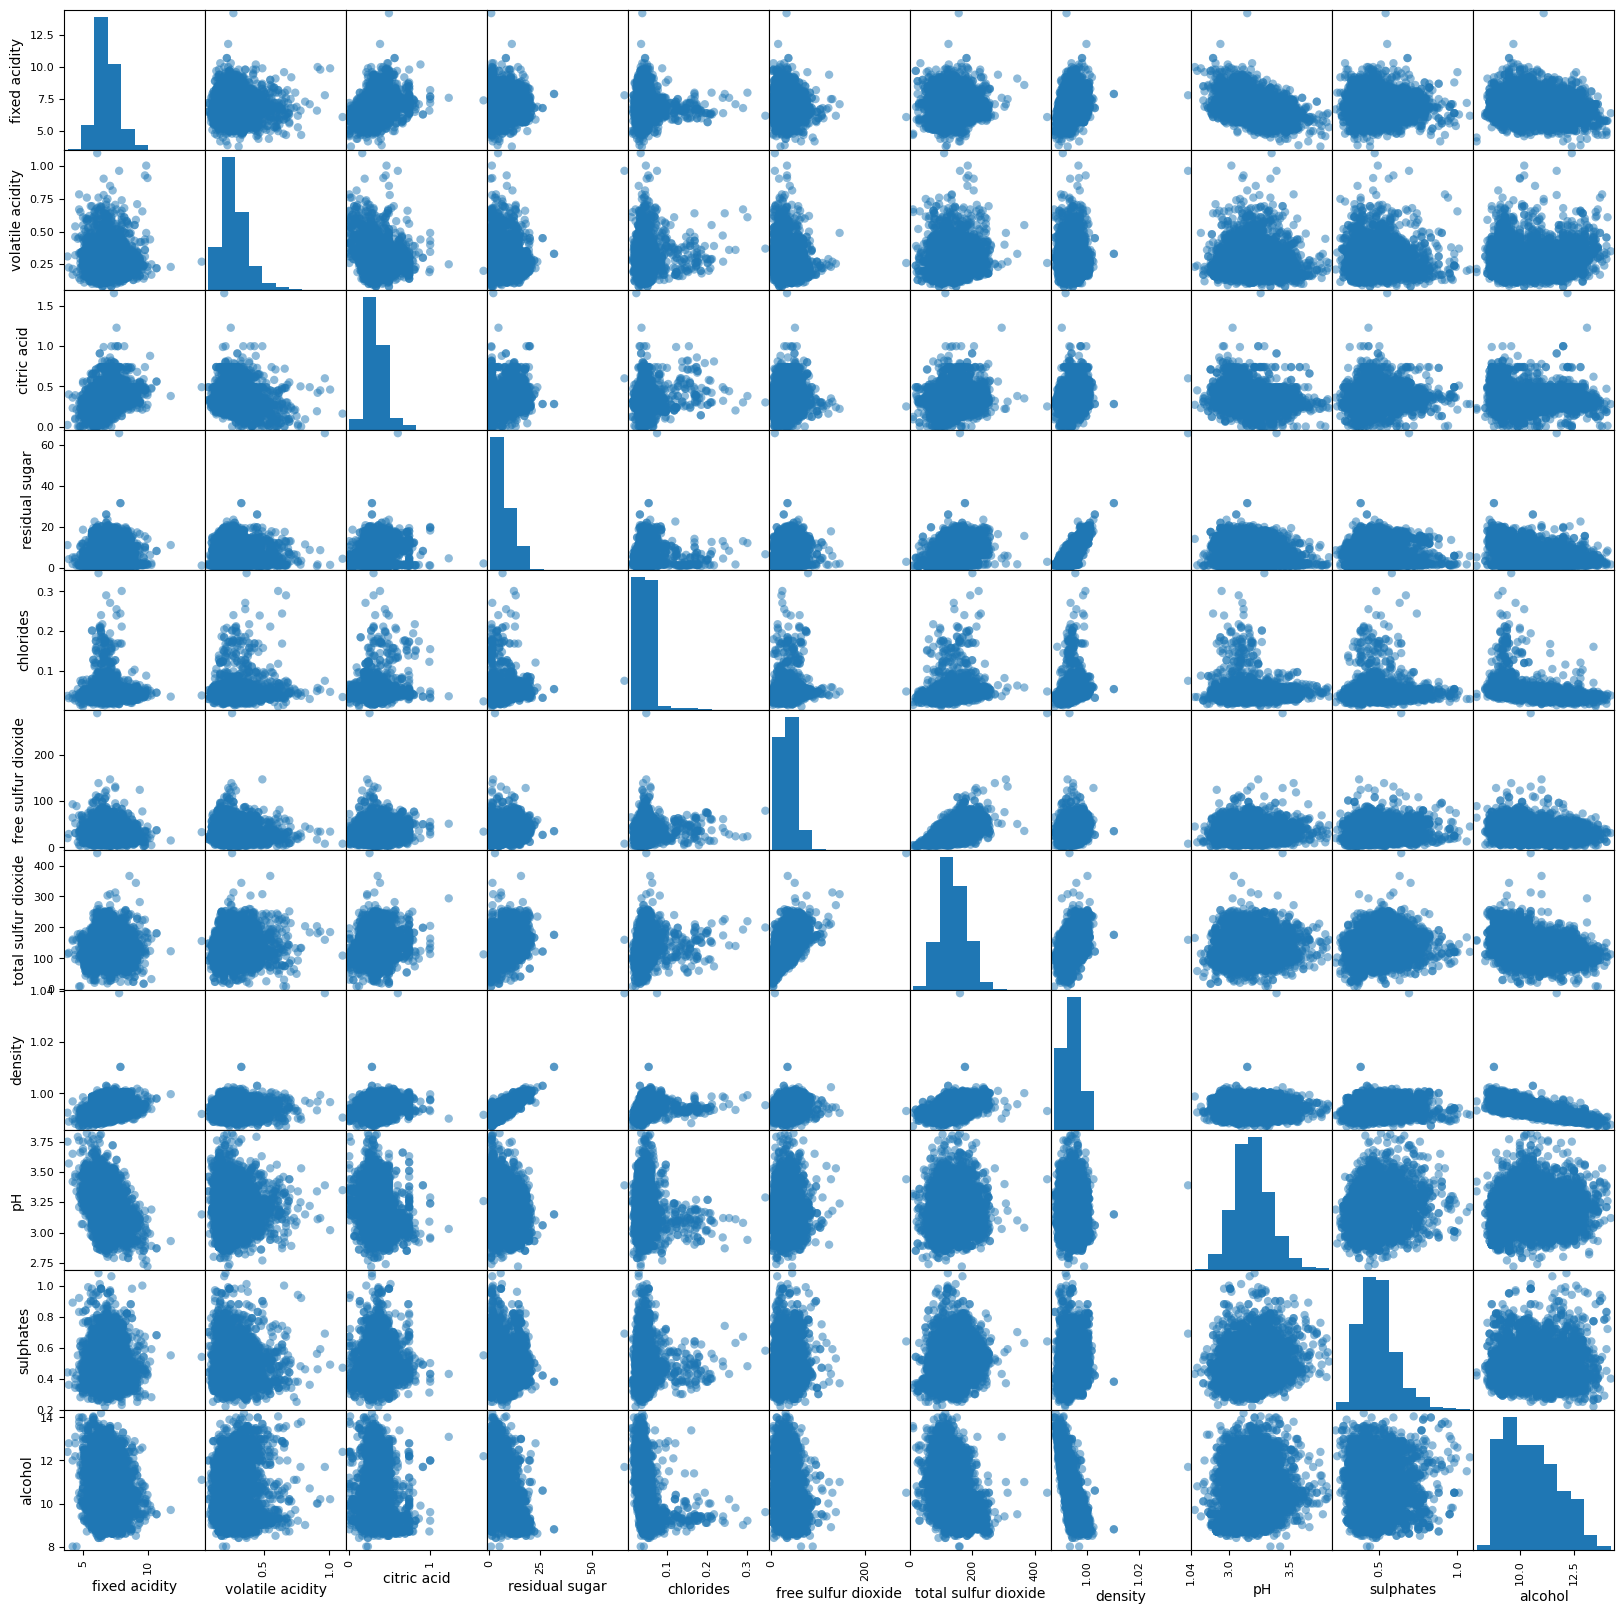

In [11]:
 pd.plotting.scatter_matrix(read[attr_list],figsize=(20,20),grid=True,marker='o')
 plt.show()

In [12]:
read.describe().transpose()

count        mean        std      min         25%  \
alcohol               4898.0   10.514253   1.230623  8.00000    9.500000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
density               4898.0    0.994028   0.002991  0.98711    0.991723   
fixed acidity         4898.0    6.854792   0.843867  3.80000    6.300000   
free sulfur dioxide   4898.0   35.308086  17.007133  2.00000   23.000000   
pH                    4898.0    3.188271   0.151001  2.72000    3.090000   
residual sugar        4898.0    6.391410   5.072068  0.60000    1.700000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
total sulfur dioxide  4898.0  138.360657  42.498055  9.00000  108.000000   
volatile acidity      4898.0    0.278241   0.100794  0.08000    0.210000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%         max  
alcohol                10.40000   11.4000   14.200000  
chlorides               0.04300    0.0500    0.346000  
citric acid             0.32000    0.3900    1.660000  
density                 0.99374    0.9961    1.038980  
fixed acidity           6.80000    7.3000   14.200000  
free sulfur dioxide    34.00000   46.0000  289.000000  
pH                      3.18000    3.2800    3.820000  
residual sugar          5.20000    9.9000   65.800003  
sulphates               0.47000    0.5500    1.080000  
total sulfur dioxide  134.00000  167.0000  440.000000  
volatile acidity        0.26000    0.3200    1.100000  
quality                 6.00000    6.0000    9.000000

In [13]:
read['free sulfur dioxide']
read = read.drop(['free sulfur dioxide'], axis=1)

In [14]:
read['quality'] = read['quality'] - 3

In [15]:
read.describe().transpose()

count        mean        std      min         25%  \
alcohol               4898.0   10.514253   1.230623  8.00000    9.500000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
density               4898.0    0.994028   0.002991  0.98711    0.991723   
fixed acidity         4898.0    6.854792   0.843867  3.80000    6.300000   
pH                    4898.0    3.188271   0.151001  2.72000    3.090000   
residual sugar        4898.0    6.391410   5.072068  0.60000    1.700000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
total sulfur dioxide  4898.0  138.360657  42.498055  9.00000  108.000000   
volatile acidity      4898.0    0.278241   0.100794  0.08000    0.210000   
quality               4898.0    2.877909   0.885639  0.00000    2.000000   

                            50%       75%         max  
alcohol                10.40000   11.4000   14.200000  
chlorides               0.04300    0.0500    0.346000  
citric acid             0.32000    0.3900    1.660000  
density                 0.99374    0.9961    1.038980  
fixed acidity           6.80000    7.3000   14.200000  
pH                      3.18000    3.2800    3.820000  
residual sugar          5.20000    9.9000   65.800003  
sulphates               0.47000    0.5500    1.080000  
total sulfur dioxide  134.00000  167.0000  440.000000  
volatile acidity        0.26000    0.3200    1.100000  
quality                 3.00000    3.0000    6.000000

In [16]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','total sulfur dioxide','density','pH','sulphates','alcohol']

training_dataset = (
    tf.data.Dataset.from_tensor_slices(
        (
            tf.cast(read[features].values, tf.float32),
            tf.cast(read['quality'].values, tf.int32)
        )
    )
)

training_dataset.save('./WINE_Data')

AttributeError: 'TensorSliceDataset' object has no attribute 'save'

In [27]:
data = read[features].to_numpy()
labels = read['quality'].to_numpy()
print(data.shape)
train_ratio = 0.70
validation_ratio = 0.20
test_ratio = 0.10
print(test_ratio/(test_ratio + validation_ratio))

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=1 - train_ratio)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

print(x_train.shape, x_test.shape, x_val.shape)

(4898, 10)
0.3333333333333333
(3428, 10) (980, 10) (490, 10)


In [1]:
from WINE_Experiment.PWBLayer_TF import PWBLinearLayer
import numpy as np
from keras import layers
import tensorflow as tf
from importlib import reload
import sys


2022-11-11 17:33:46.605819: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 17:33:46.605879: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-11 17:33:51.089737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-11 17:33:51.099726: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-11 17:33:51.099903: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcub

In [2]:
BIAS_RANGE = 1
pwb_layer = PWBLinearLayer(3, activation=None, precision=100000)
regular_layer = layers.Dense(
    3,
    activation=None,
    bias_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
    kernel_constraint=lambda t: tf.clip_by_value(t, -1.0, 1.0),
    bias_initializer=tf.keras.initializers.RandomUniform(minval=-BIAS_RANGE, maxval=BIAS_RANGE, seed=None),
)

test_data = tf.random.uniform(shape=[1, 5], minval=-1, maxval=1, seed=10)
y_regular = regular_layer(test_data)
y_pwb = pwb_layer(test_data)
pwb_layer.set_weights(regular_layer.weights)
y_regular = regular_layer(test_data)
y_pwb = pwb_layer(test_data)

print(f"regular output data: {y_regular}")
print(f"pwb output data: {y_pwb}")

regular output data: [[-1.1594391   0.90769005  0.28839782]]
pwb output data: [[-1.1591699   0.90764844  0.28851053]]
